<AxesSubplot:xlabel='Date'>

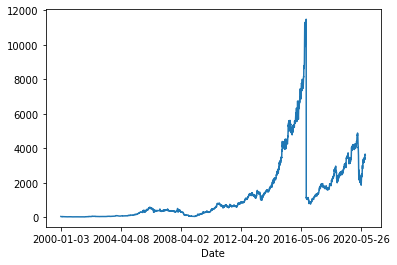

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('BAJFINANCE.csv')
df.head(3)

df.set_index('Date',inplace=True)

df['VWAP'].plot()


In [2]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [3]:
df.dropna(inplace=True)
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [4]:
data = df.copy()
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [5]:
lag_features = ['High','Low','Volume','Turnover','Trades']
window1 =3
window2 = 7
for feature in lag_features:
    data[feature + 'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    data[feature + 'rolling_mean_7'] = data[feature].rolling(window=window2).mean()
    

In [6]:
for feature in lag_features:
    data[feature + 'rolling_std_3'] = data[feature].rolling(window=window1).std()
    data[feature + 'rolling_std_7'] = data[feature].rolling(window=window2).std()
data.columns
    

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [7]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [8]:
data.dropna(inplace=True)
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [9]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [10]:
training_data  = data[0:1800]
test_data = data[:1800]

In [11]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
from pmdarima import auto_arima
model = auto_arima(y = training_data['VWAP'],exogenous= training_data[ind_features], trace= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.230 seconds


In [17]:
model.fit(training_data['VWAP'],training_data[ind_features] )

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
forecast= model.predict(n_periods = len(test_data), exogenous  = test_data[ind_features])

ValueError: When an ARIMA is fit with an X array, it must also be provided one for predicting or updating observations.

In [ ]:
test_data['Forecast_ARIMA']=forecast
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))
from sklearn.metrics import mean_absolute_error, mean_squared_error
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

In [1]:
import pandas as pd
from pmdarima import auto_arima
import warnings
import plotly.express as px

# Load the dataset
df = pd.read_csv('BAJFINANCE.csv')
df.set_index('Date', inplace=True)

# Create lag features
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

for feature in lag_features:
    df[feature + '_rolling_mean_3'] = df[feature].rolling(window=window1).mean()
    df[feature + '_rolling_mean_7'] = df[feature].rolling(window=window2).mean()

    df[feature + '_rolling_std_3'] = df[feature].rolling(window=window1).std()
    df[feature + '_rolling_std_7'] = df[feature].rolling(window=window2).std()

df.dropna(inplace=True)

ind_features = ['High_rolling_mean_3', 'High_rolling_mean_7',
                'Low_rolling_mean_3', 'Low_rolling_mean_7',
                'Volume_rolling_mean_3', 'Volume_rolling_mean_7',
                'Turnover_rolling_mean_3', 'Turnover_rolling_mean_7',
                'Trades_rolling_mean_3', 'Trades_rolling_mean_7',
                'High_rolling_std_3', 'High_rolling_std_7',
                'Low_rolling_std_3', 'Low_rolling_std_7',
                'Volume_rolling_std_3', 'Volume_rolling_std_7',
                'Turnover_rolling_std_3', 'Turnover_rolling_std_7',
                'Trades_rolling_std_3', 'Trades_rolling_std_7']

# Split the data into training and test sets
training_data = df.iloc[:1800]
test_data = df.iloc[1800:]

# Filter out the exogenous variables for training and test
training_exog = training_data[ind_features]
test_exog = test_data[ind_features]

# Auto ARIMA model fitting
warnings.filterwarnings('ignore')
model = auto_arima(y=training_data['VWAP'], exogenous=training_exog, trace=True)
fitted_model = model.fit(y=training_data['VWAP'], exogenous=training_exog)

# Make predictions using the fitted ARIMA model
forecast = fitted_model.predict(n_periods=len(test_data), exogenous=test_exog)

# Add the forecasted values to the test_data DataFrame
test_data['Forecast_ARIMA'] = forecast

# Plot the actual VWAP and ARIMA forecast using plotly
fig = px.line(test_data, x=test_data.index, y=['VWAP', 'Forecast_ARIMA'], title='Actual VWAP vs. ARIMA Forecast')
fig.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.142 seconds


In [4]:
import pandas as pd
from pmdarima import auto_arima
import warnings
import plotly.express as px

# Load the dataset
df = pd.read_csv('BAJFINANCE.csv')
df.set_index('Date', inplace=True)

# Create lag features
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

for feature in lag_features:
    df[feature + '_rolling_mean_3'] = df[feature].rolling(window=window1).mean()
    df[feature + '_rolling_mean_7'] = df[feature].rolling(window=window2).mean()

    df[feature + '_rolling_std_3'] = df[feature].rolling(window=window1).std()
    df[feature + '_rolling_std_7'] = df[feature].rolling(window=window2).std()

df.dropna(inplace=True)

ind_features = ['High_rolling_mean_3', 'High_rolling_mean_7',
                'Low_rolling_mean_3', 'Low_rolling_mean_7',
                'Volume_rolling_mean_3', 'Volume_rolling_mean_7',
                'Turnover_rolling_mean_3', 'Turnover_rolling_mean_7',
                'Trades_rolling_mean_3', 'Trades_rolling_mean_7',
                'High_rolling_std_3', 'High_rolling_std_7',
                'Low_rolling_std_3', 'Low_rolling_std_7',
                'Volume_rolling_std_3', 'Volume_rolling_std_7',
                'Turnover_rolling_std_3', 'Turnover_rolling_std_7',
                'Trades_rolling_std_3', 'Trades_rolling_std_7']

# Split the data into training and test sets
training_data = df.iloc[:1800]
test_data = df.iloc[1800:]

# Filter out the exogenous variables for training and test
training_exog = training_data[ind_features]
test_exog = test_data[ind_features]

# Auto ARIMA model fitting
warnings.filterwarnings('ignore')
model = auto_arima(y=training_data['VWAP'], exogenous=training_exog, trace=True)
fitted_model = model.fit(y=training_data['VWAP'], exogenous=training_exog)

# Make predictions using the fitted ARIMA model
forecast = fitted_model.predict(n_periods=len(test_data), exogenous=test_exog)

# Add the forecasted values to the test_data DataFrame
test_data['Forecast_ARIMA'] = forecast

# Create an interactive plot using plotly
fig = px.line(test_data, x=test_data.index, y=['VWAP', 'Forecast_ARIMA'],
              title='Actual VWAP vs. ARIMA Forecast')
fig.update_layout(xaxis_title='Date', yaxis_title='VWAP', legend_title='Legend')
fig.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.126 seconds
